In [5]:
#import Aer here, before calling qiskit_ionq_provider
from qiskit import Aer, execute

from qiskit_ionq_provider import IonQProvider 
from qiskit.quantum_info import entropy, DensityMatrix, partial_trace
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram
from qiskit.providers.jobstatus import JobStatus
from qiskit import QuantumCircuit
#os.environ["QISKIT_IONQ_API_TOKEN"] = "fKEzcvLO0NEQCzgIIZYxin1hkrQcyvXa"
with open(".ionqkey.txt") as keyfile:
    key = keyfile.readline().strip('\n')
#Call provider and set token value
provider = IonQProvider(token=key)#Call provider and set token value

In [8]:
#enter an integer from 1 to 15 and a number of repetitions for the "people" playing telephone
def telephone(num,reps):
    if 0<num<16:
    bitstring = '{0:b}'.format(num) 
    bits=len(bitstring)
    qc = QuantumCircuit(2*bits,2*bits)
    for i in range(bits): #encode number as bitstring on first half of QC register
        j = bitstring[i]
        if j=='1':
            qc.x(i)
    for n in range(reps): #"whisper" word back and forth reps number of times.
        for i in range(bits):
            qc.swap(i,bits+i)
    qc.measure(range(2*bits),range(2*bits))
    return qc

In [124]:
telephone(10,5).draw()

┌───┐                                                               ┌─┐   »
q_0: ┤ X ├────X───────────X───────────X───────────X───────────X──────────┤M├───»
     └───┘    │           │           │           │           │    ┌─┐   └╥┘   »
q_1: ──────X──┼─────X─────┼─────X─────┼─────X─────┼─────X─────┼────┤M├────╫────»
     ┌───┐ │  │     │     │     │     │     │     │     │     │    └╥┘    ║ ┌─┐»
q_2: ┤ X ├─┼──┼──X──┼─────┼──X──┼─────┼──X──┼─────┼──X──┼─────┼──X──╫─────╫─┤M├»
     └───┘ │  │  │  │     │  │  │     │  │  │     │  │  │     │  │  ║ ┌─┐ ║ └╥┘»
q_3: ──X───┼──┼──┼──┼──X──┼──┼──┼──X──┼──┼──┼──X──┼──┼──┼──X──┼──┼──╫─┤M├─╫──╫─»
       │   │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  ║ └╥┘ ║  ║ »
q_4: ──┼───┼──X──┼──┼──┼──X──┼──┼──┼──X──┼──┼──┼──X──┼──┼──┼──X──┼──╫──╫──╫──╫─»
       │   │     │  │  │     │  │  │     │  │  │     │  │  │ ┌─┐ │  ║  ║  ║  ║ »
q_5: ──┼───X─────┼──X──┼─────┼──X──┼─────┼──X──┼─────┼──X──┼─┤M├─┼──╫──╫──╫──╫─»
       │         │     │     │     │     │     │     │     │ └╥┘ │  ║  ║  ║  ║ »
q_6: ──┼─────────X─────┼─────X─────┼─────X─────┼─────X─────┼──╫──X──╫──╫──╫──╫─»
       │               │           │           │           │  ║ ┌─┐ ║  ║  ║  ║ »
q_7: ──X───────────────X───────────X───────────X───────────X──╫─┤M├─╫──╫──╫──╫─»
                                                              ║ └╥┘ ║  ║  ║  ║ »
c: 8/═════════════════════════════════════════════════════════╩══╩══╩══╩══╩══╩═»
                                                              5  7  1  3  0  2 »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«           
«q_3: ──────
«     ┌─┐   
«q_4: ┤M├───
«     └╥┘   
«q_5: ─╫────
«      ║ ┌─┐
«q_6: ─╫─┤M├
«      ║ └╥┘
«q_7: ─╫──╫─
«      ║  ║ 
«c: 8/═╩══╩═
«      4  6

In [122]:
# Next get an IonQ hardware backend to run circuits on:
qpu_backend = provider.get_backend("ionq_qpu")

# Then run the circuit:
qpu_job_telephone = qpu_backend.run(telephone(10,5))

#Store job id
job_id_telephone = qpu_job_telephone.job_id()

In [127]:
#Check if job is done
if qpu_job_telephone.status() is JobStatus.DONE:
    
    print("Job status is DONE")
    
    # Fetch the result:
    qpu_result_telephone = qpu_job_telephone.result()
   
else:
    print("Job status is ", qpu_job_telephone.status() )

Job status is DONE


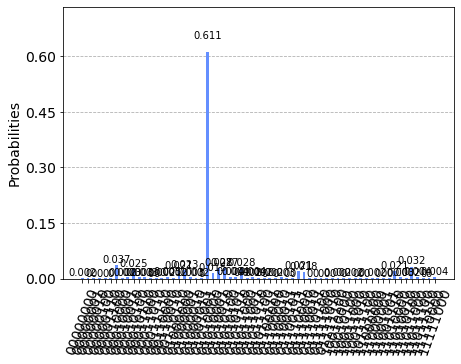

In [128]:
#If Job is finished, plot and validate results:
plot_histogram(qpu_result_telephone.get_counts())